# **DATA AUGMENTATION**


1)Install Opencv2 from pip

2)Import python libraries Opencv2, os and numpy

3)Get the path to your folder images

4)Load your images using Opencv2

5)Define the degree of rotation and the scale factor

6)Define the translation factor

7)Apply data augmentation transformations on your images

8)Save your transformed images in a new folder

In [28]:
# Import Google Drive libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Authenticate with your Google Account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [31]:
from google.colab import drive
path = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas
!pip install pydicom
!conda install -c conda-forge gdcm -y
!pip install -U python-gdcm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.3 MB/s 
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 3.8 MB/s 


In [ ]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import pydicom
import gdcm
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Cargar dataset train
train_data=pd.read_csv('/content/drive/MyDrive/old_DP4/train.csv')

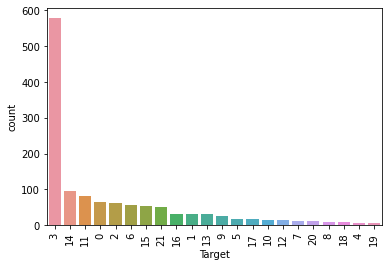

In [ ]:
sns.countplot(data = train_data,x= "Target",order = train_data.Target.value_counts().index)
plt.xticks(rotation = 'vertical')
plt.show()

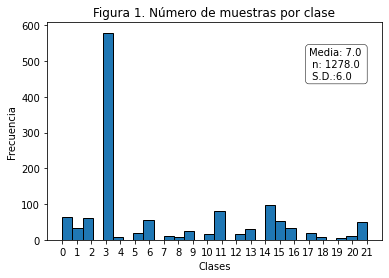

In [ ]:
# Distribución de la variable Target
res = train_data.Target.describe()  
m = round(res['mean'],0) 
sd = round(res['std'],0)
n = round(res['count'],0)

x = train_data.Target
plt.hist(x, edgecolor='black', bins=30)
plt.xticks(np.arange(0, 22, step=1))
plt.title('Figura 1. Número de muestras por clase')
plt.ylabel('Frecuencia')
plt.xlabel('Clases')
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(17, 450, f'Media: {m} \n n: {n} \n S.D.:{sd}', bbox=props)
#plt.legend(loc='upper left', bbox_to_anchor=(0.73, 0.76))
plt.show()

In [ ]:
#pd.crosstab(index=wbr['cnt_cat2'], columns="count")
pd.crosstab(index=train_data['Target'], columns='count')

col_0,count
Target,
0,64
1,32
2,61
3,579
4,7
5,18
6,56
7,12
8,9


In [ ]:
# las categorías ordenadas de más numerosas a menos
train_cat = train_data.groupby(['Target']).size()
train_cat.sort_values(ascending=False)

Target
3     579
14     96
11     81
0      64
2      61
6      56
15     53
21     50
1      32
16     32
13     31
9      24
5      18
17     18
10     15
12     15
7      12
20     12
8       9
18      8
4       7
19      5
dtype: int64

# **Criterio 1 : Referencias estadisticas**

In [ ]:
#calculamos media, varianza y desviación típica
from math import sqrt
def media(lista):
  s = 0
  for elemento in lista:
    s += elemento
  return s / float(len(lista))
 
def varianza(lista):
  s = 0
  m = media(lista)
  for elemento in lista:
    s += (elemento - m) ** 2
  return s / float(len(lista))
 
def desviacion_tipica(lista):
  return sqrt(varianza(lista))
 
lista=[64, 32, 61, 579, 7, 18, 56, 12, 9, 24, 15, 81, 15, 31, 96, 53, 32, 18, 8, 5, 12, 50]
print('Media = ', media(lista))
print('Varianza = ', varianza(lista))
print('Desviación Típica =', desviacion_tipica(lista))

Media =  58.09090909090909
Varianza =  13555.900826446275
Desviación Típica = 116.4298107292384


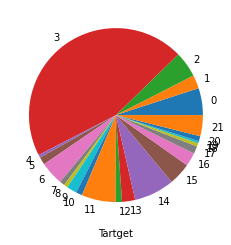

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("/content/drive/MyDrive/old_DP4/train.csv")
tab = pd.crosstab(index=train_data["Target"],columns="Frecuencia")
plt.pie(tab,labels=tab.index)
plt.xlabel("Tartget")
plt.savefig("frecuencia.png")


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/19/1.2.826.0.1.3680043.8.498.11031510990975440858061928285262416938.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/19', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 20:
        # otherwise the generator would loop indefinitely
        break  # otherwise the generator would loop indefinitely

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/19/1.2.826.0.1.3680043.8.498.24440705804470733239035479909422933701.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/19', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 20:
        # otherwise the generator would loop indefinitely
        break  # otherwise the generator would loop indefinitely

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/19/1.2.826.0.1.3680043.8.498.40359932981956163394016536174708622849.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/19', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 13:
        # otherwise the generator would loop indefinitely
        break  # otherwise the generator would loop indefinitely

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/4/1.2.826.0.1.3680043.8.498.13136173568794837609137982145482996748.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/4', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 15:
        # otherwise the generator would loop indefinitely
        break  # otherwise the generator would loop indefinitely

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/4/1.2.826.0.1.3680043.8.498.32467620439025796224161045738740609166.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/4', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 16:
        # otherwise the generator would loop indefinitely
        break  # otherwise the generator would loop indefinitely

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/6/1.2.826.0.1.3680043.8.498.10159498614160056038769051549755437120.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/6', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 2:
        # otherwise the generator would loop indefinitely
        break  # otherwise the generator would loop indefinitely

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/15/1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)


i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/15', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 2:
        # otherwise the generator would loop indefinitely
        break  # otherwise the generator would loop indefinitely

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/21/1.2.826.0.1.3680043.8.498.10423267111363824461063550726749517156.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/21', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 8:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/1/1.2.826.0.1.3680043.8.498.10319865801164854092101901165773590360.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/1', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 26:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/16/1.2.826.0.1.3680043.8.498.10603862758592967408863259452643881675.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/16', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 27:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/13/1.2.826.0.1.3680043.8.498.11775638366925338207782472982219856238.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/13', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 26:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/9/1.2.826.0.1.3680043.8.498.12995270219971941119897501347924014758.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/9', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 26:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/9/1.2.826.0.1.3680043.8.498.72926634239167532999574001843496366695.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/9', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 8:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/5/1.2.826.0.1.3680043.8.498.12742169316804383951377645521252873815.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/5', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 20:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/5/1.2.826.0.1.3680043.8.498.11504724594984965602352794642021327380.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/5', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 20:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/17/1.2.826.0.1.3680043.8.498.33233498117043112931807197645640682435.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/17', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 12:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/17/1.2.826.0.1.3680043.8.498.59689895686743445043932589038641883416.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/17', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 12:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/10/1.2.826.0.1.3680043.8.498.21739376742858908135232935836921176201.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/10', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 23:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/10/1.2.826.0.1.3680043.8.498.81506933133020096433590190057730092007.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/10', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 20:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/12/1.2.826.0.1.3680043.8.498.17901038519845584736169888474832802901.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/12', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 23:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/12/1.2.826.0.1.3680043.8.498.74706890867516652449775415791336271251.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/12', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 20:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/7/1.2.826.0.1.3680043.8.498.12994482986450849724936735513895958623.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/7', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 23:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/7/1.2.826.0.1.3680043.8.498.88318020075632549388553812733236192216.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/7', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 8:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/20/1.2.826.0.1.3680043.8.498.12764119488911678486346710898310965684.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/20', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 23:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/8/1.2.826.0.1.3680043.8.498.84376932274171387825449553240103366458.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/8', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 25:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/18/1.2.826.0.1.3680043.8.498.73937651257440220107765064635207306113.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/18', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 40:
     
             break  

In [ ]:
img= load_img('/content/drive/MyDrive/DP4/TRAIN_JPG/18/1.2.826.0.1.3680043.8.498.91465170490095408886160788207300663366.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/DP4/TRAIN_JPG/18', save_prefix='augmentation', save_format='jpg'):
    i += 1
    if i > 40:
     
             break  

# **DENSENET 224x224**

In [ ]:
# Import fastai
from fastai.vision import *

In [ ]:
# Load data
batch_size = 32 
size = 224 
data = ImageDataBunch.from_folder(path='/content/drive/MyDrive/DP4', train="/content/drive/MyDrive/DP4/TRAIN_JPG", test="/content/drive/MyDrive/DP4/TEST_JPG", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

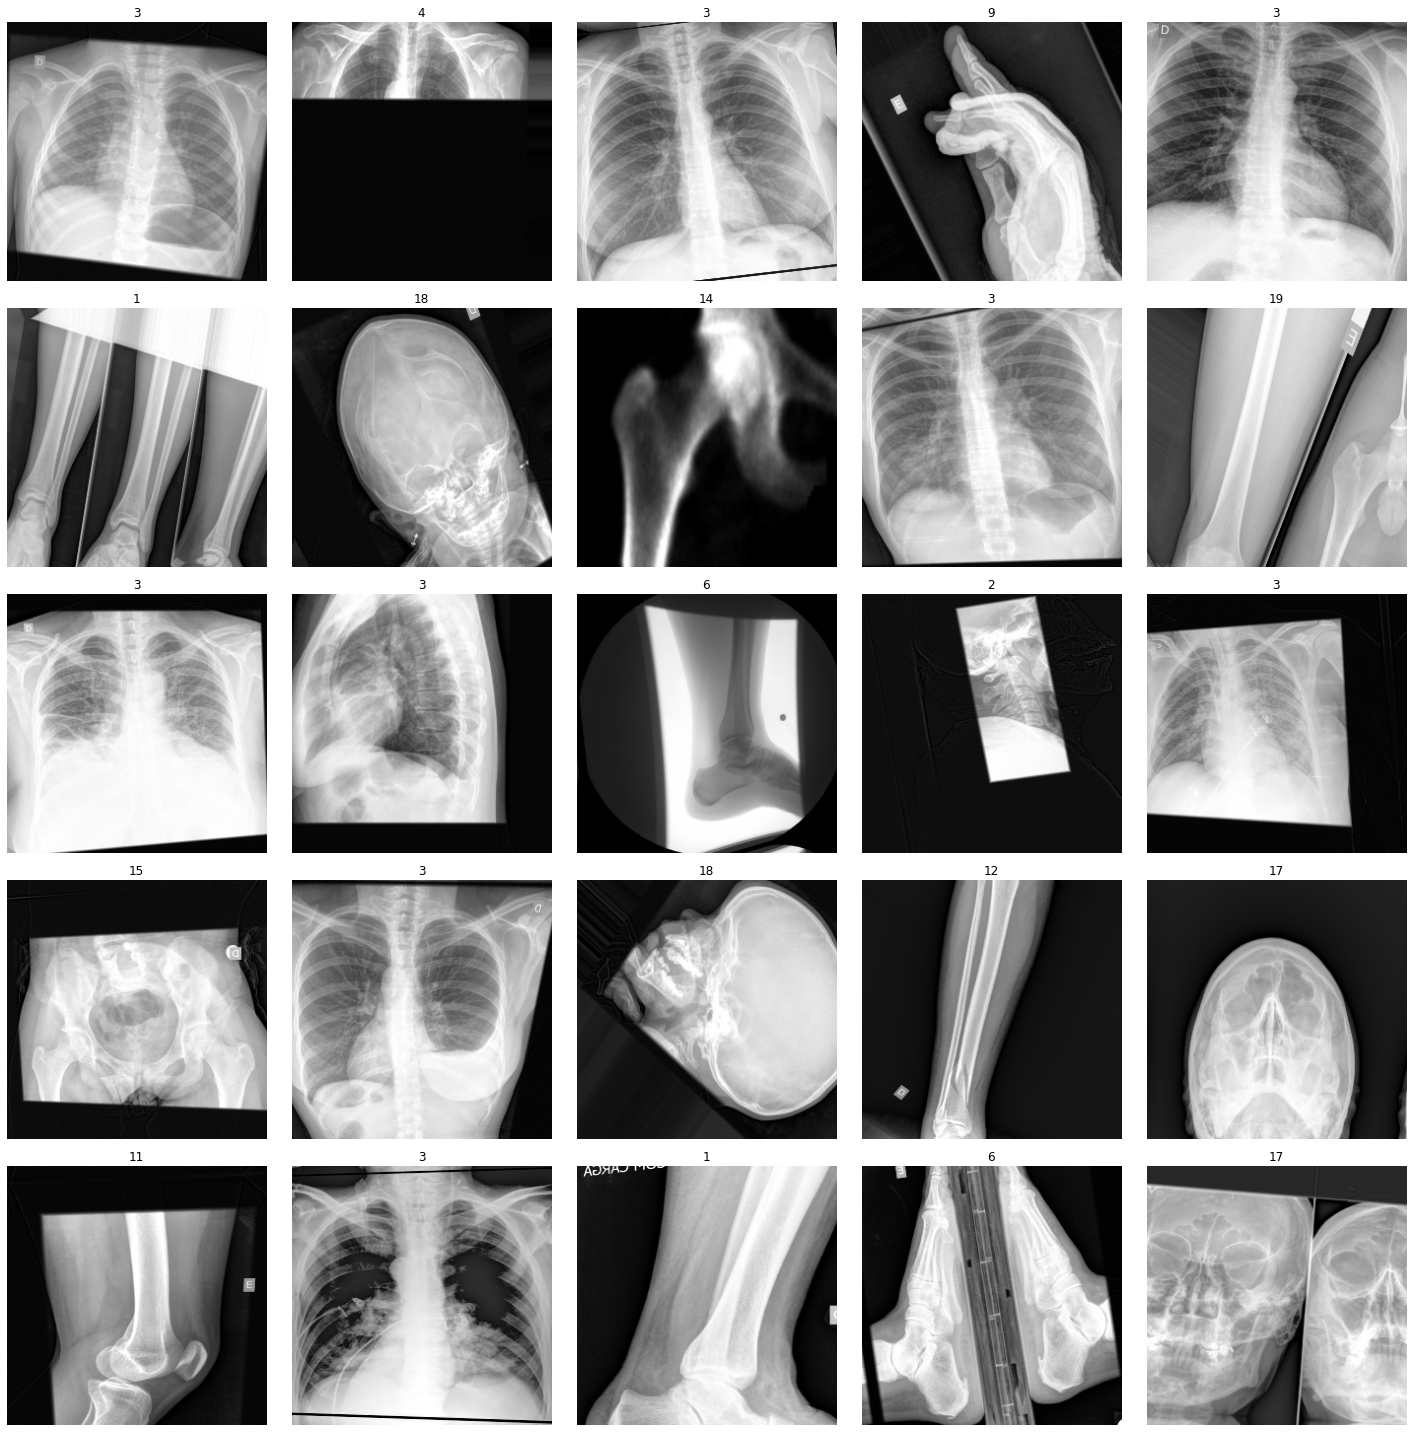

In [ ]:
data.show_batch()

In [32]:
print(len(data.train_ds), len(data.test_ds), len(data.valid_ds))

1508 328 377


In [ ]:
data.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

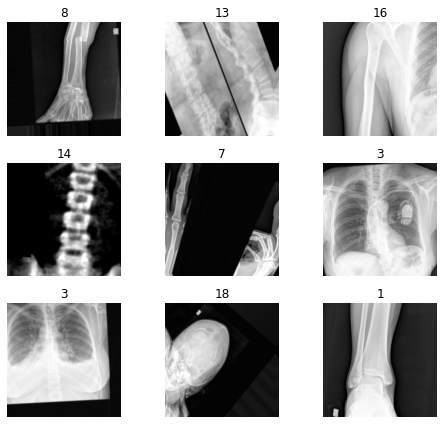

In [ ]:
# Show samples of data
data.show_batch(rows=6, figsize=(7,6))

In [33]:
from torchvision.models.densenet import densenet201
densenet201

<function torchvision.models.densenet.densenet201>

In [34]:
# Initialize learner
learn = cnn_learner(data, models.densenet201, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

In [35]:
# Configure learner with new data and freeze conv layers
learn.data = data
learn.freeze()

In [36]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-03
Min loss divided by 10: 5.75E-03


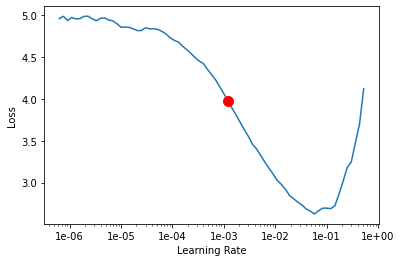

In [37]:
# Find learning rate
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [38]:
# Set learning rate 
lr =  1.20E-03

In [39]:
# Train 5 epochs
learn.fit_one_cycle(7, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.650732,0.849629,0.785146,04:36
1,1.193433,0.370530,0.893899,04:22
2,0.654007,0.360608,0.917772,04:18
3,0.412792,0.276336,0.933687,04:21
4,0.258486,0.290167,0.923077,04:20
5,0.197449,0.255022,0.936339,04:19
6,0.156502,0.251890,0.938992,04:18


In [40]:
# save results
dicom_dir = '/content/drive/MyDrive/DP4/TEST_JPG'
files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir)]
with open('/content/drive/MyDrive/DP4/submission_densenet169_224_32_7e_freeze_Augm_mean.csv', 'w') as sub_f:
  sub_f.write('SOPInstanceUID,Target')
  sub_f.write('\n')
  for f in files:
    file_name = f.split('/')[6].replace('.jpg','')
    image2 = PIL.Image.open(f).convert('RGB')
    t = pil2tensor(image2, dtype=np.float32)
    t.div_(255)
    im = Image(t)
    cat, tensor, probs = learn.predict(im)
    sub_f.write(file_name)
    sub_f.write(',')
    sub_f.write(str(cat))
    sub_f.write('\n')

In [41]:
# Save model
learn.save("densenet201_224_32_7e_aug_freeze")

In [42]:
# Unfreeze conv layers
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 5.75E-07


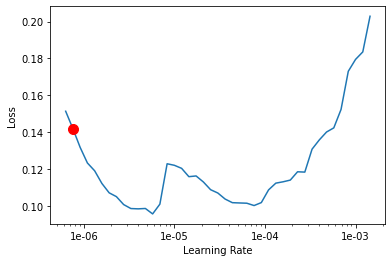

In [43]:
# Find learning rate
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [44]:
# Set learning rate 2e-6
lr = 7.59E-07

In [48]:
# Train 5 epochs
learn.fit_one_cycle(1, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.113712,0.253821,0.941645,04:31


In [49]:
# Save model
learn.save("score-dens201_224-32_7+4epoch_aug_unfreeze")

In [50]:
# save results
dicom_dir = '/content/drive/MyDrive/DP4/TEST_JPG'
files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir)]
with open('/content/drive/MyDrive/DP4/submission201_resnet19_224-32_7+4epoch_unfreeze.csv', 'w') as sub_f:
  sub_f.write('SOPInstanceUID,Target')
  sub_f.write('\n')
  for f in files:
    file_name = f.split('/')[6].replace('.jpg','')
    image2 = PIL.Image.open(f).convert('RGB')
    t = pil2tensor(image2, dtype=np.float32)
    t.div_(255)
    im = Image(t)
    cat, tensor, probs = learn.predict(im)
    sub_f.write(file_name)
    sub_f.write(',')
    sub_f.write(str(cat))
    sub_f.write('\n')

# **Evalución de Resultados**

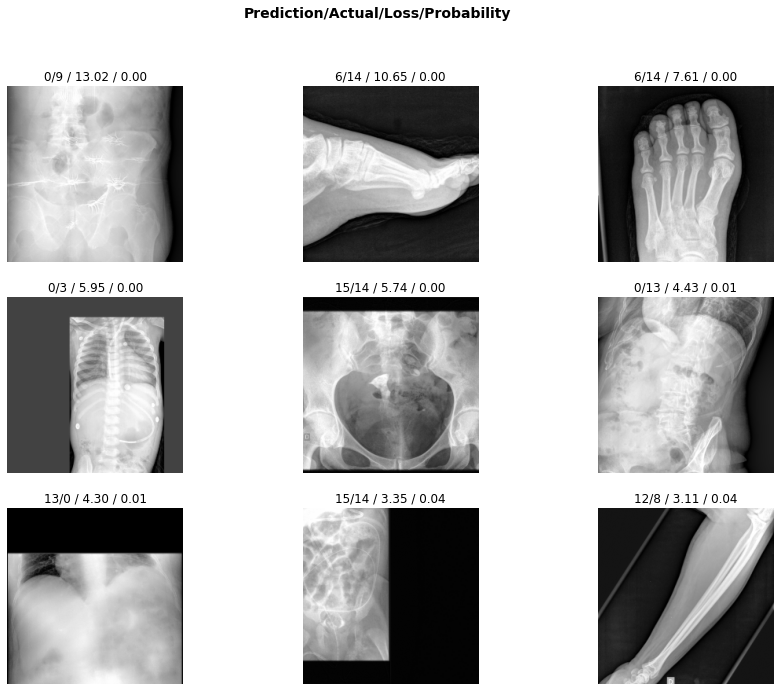

In [51]:
# Mostrar muestras peor classificadas
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

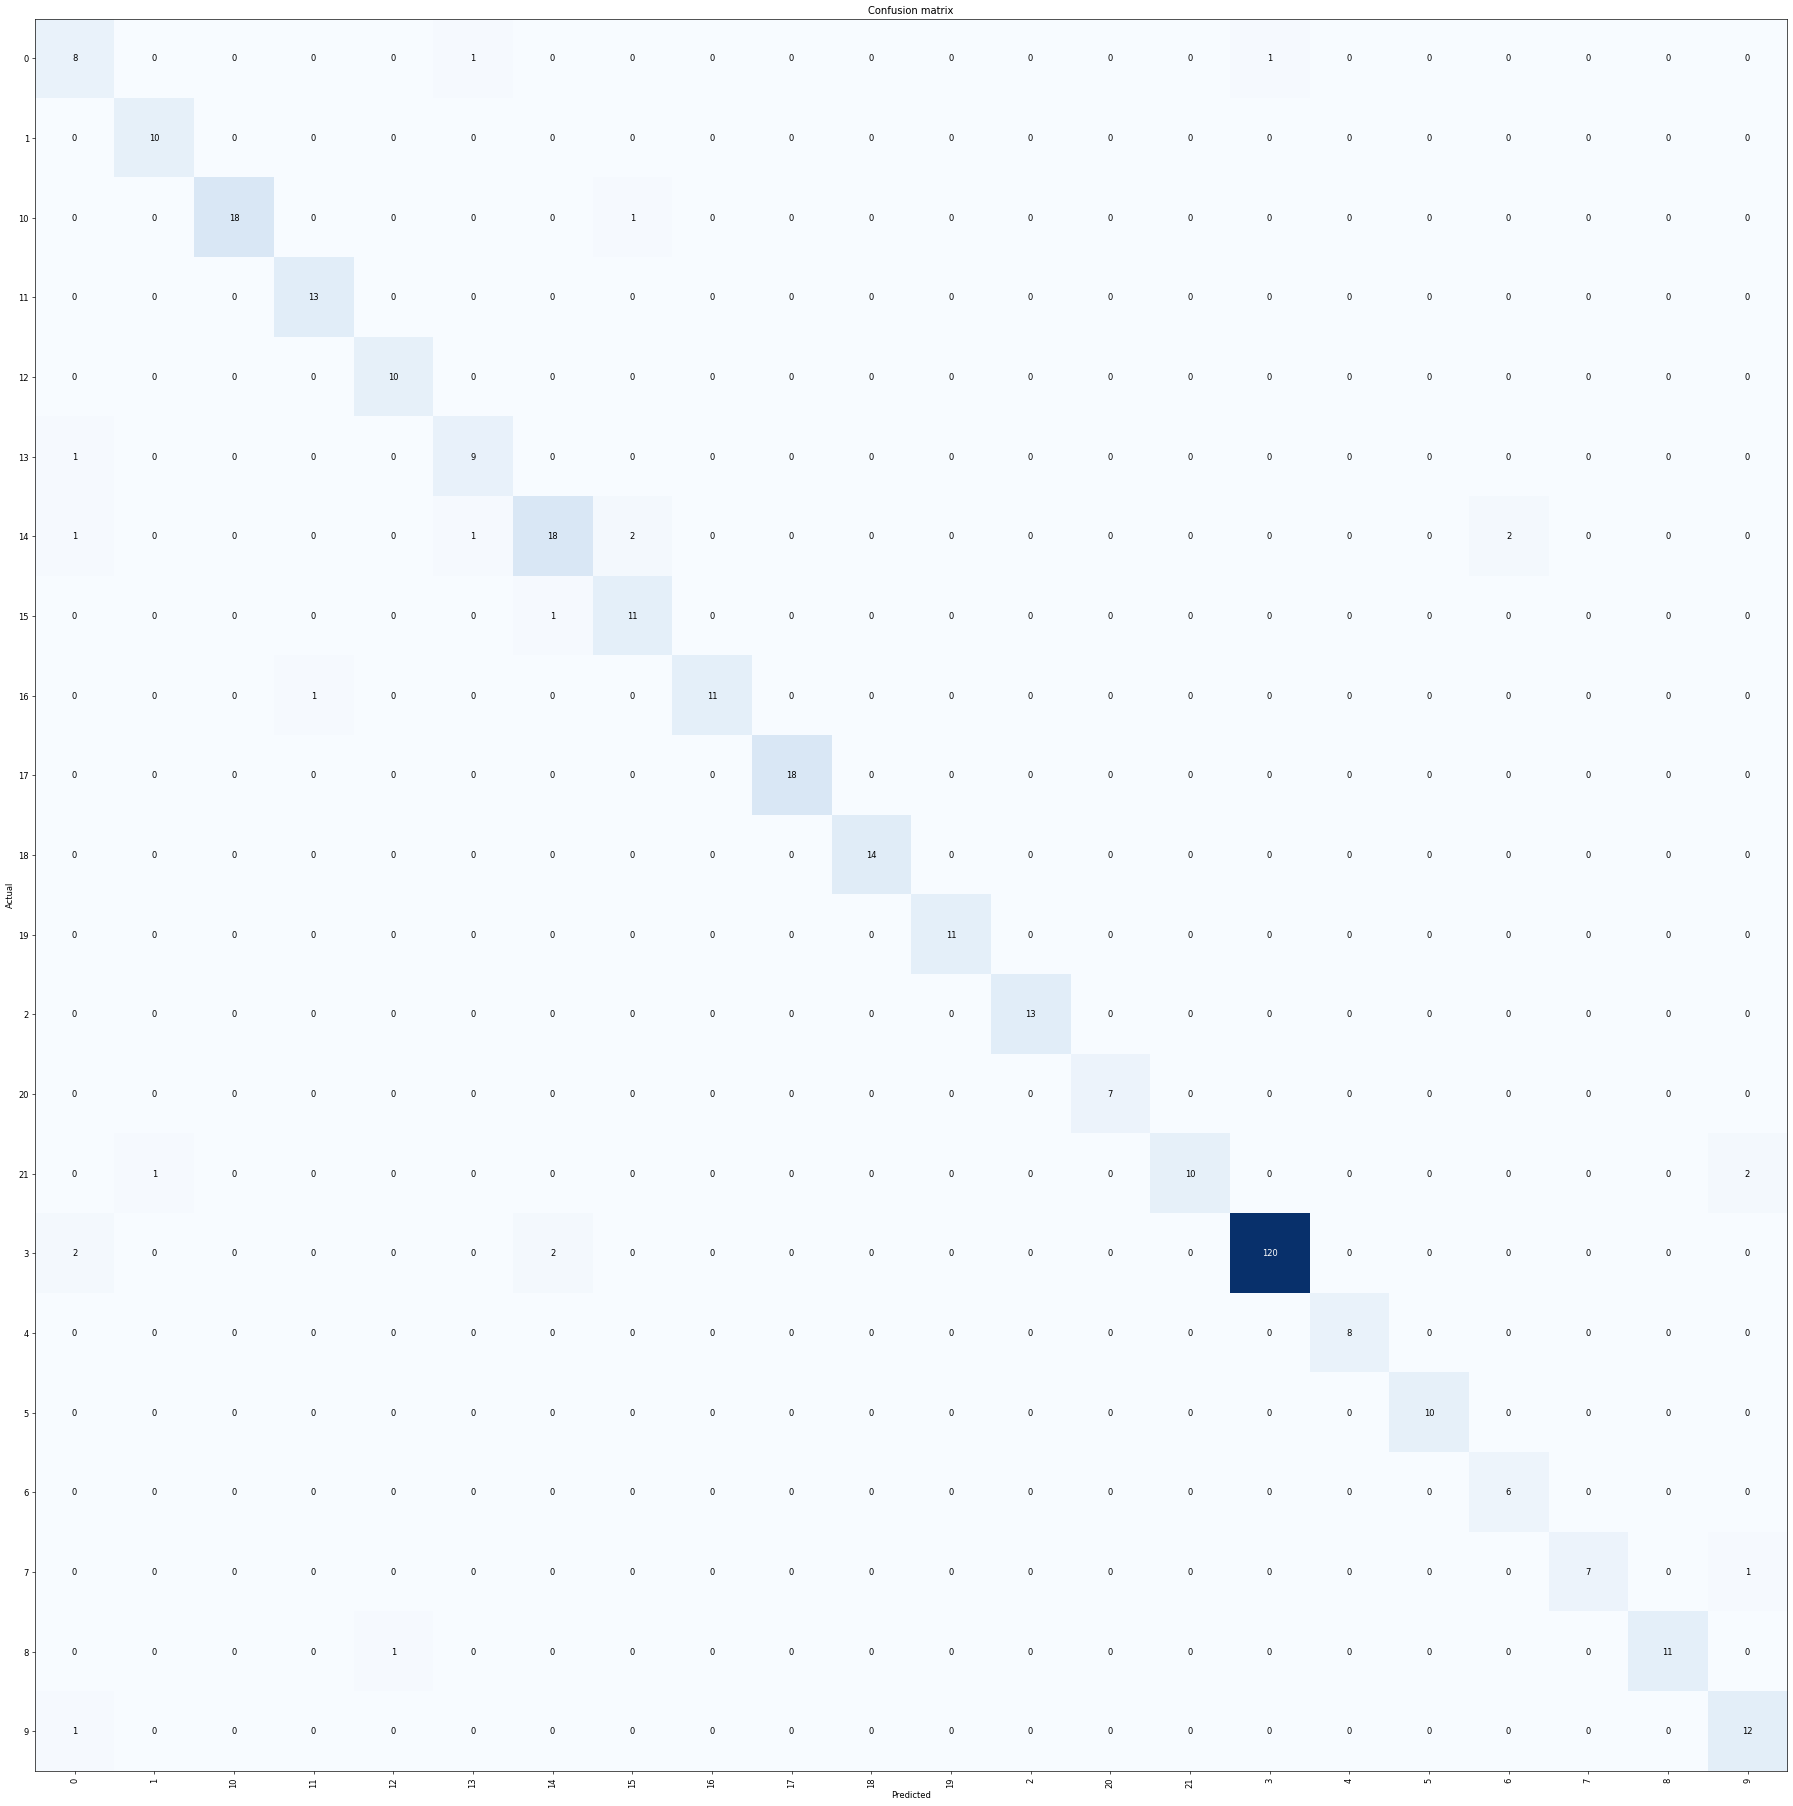

In [52]:
# Show confusion matrix
interp.plot_confusion_matrix(figsize=(30,30), dpi=60)

In [53]:
# Show most confused classes
interp.most_confused(min_val=2)

[('14', '15', 2),
 ('14', '6', 2),
 ('21', '9', 2),
 ('3', '0', 2),
 ('3', '14', 2)]